In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [109]:
accre_data = pd.read_csv('data/july-2017-thru-june-2018.txt', delimiter='|', nrows = 100000)
accre_data.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,Eligible,Start,End,Elapsed,ExitCode,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,2017-07-02T00:42:59,2017-07-03T02:13:59,2017-07-04T03:19:20,1-01:05:21,0:0,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,2017-07-02T00:42:59,2017-07-03T02:20:08,2017-07-04T02:11:55,23:51:47,0:0,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,2017-07-02T00:42:59,2017-07-03T02:41:13,2017-07-04T04:41:04,1-01:59:51,0:0,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,2017-07-02T00:42:59,2017-07-03T02:51:53,2017-07-04T10:54:13,1-08:02:20,0:0,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,00:00:10,0:0,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21
5,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,2017-07-01T05:00:01,2017-07-01T05:00:04,2017-07-01T05:03:22,00:03:18,0:0,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
6,15811619,15811619,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:00:02,2017-07-01T05:00:02,2017-07-01T05:00:04,2017-07-01T05:02:07,00:02:03,0:0,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1062,skim_test
7,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,2017-07-01T05:00:22,2017-07-01T05:00:23,2017-07-01T05:00:33,00:00:10,0:0,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
8,15811624,15811624,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:01:01,2017-07-01T05:01:01,2017-07-01T05:01:02,2017-07-01T05:05:49,00:04:47,0:0,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp670,skim_test
9,15811625,15811625,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:01:02,2017-07-01T05:01:02,2017-07-01T05:01:05,2017-07-01T05:04:17,00:03:12,0:0,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1078,skim_test


In [110]:
accre_data.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

### Recast date/time columns as datetime format

In [111]:
accre_data.Submit = pd.to_datetime(accre_data.Submit)
#accre_data.Eligible = pd.to_datetime(accre_data.Eligible)
accre_data.Start = pd.to_datetime(accre_data.Start)
#accre_data.End = pd.to_datetime(accre_data.End)

In [112]:
### Calculate WaitTime and assign to new column

In [113]:
accre_data['WaitTime'] = accre_data.Start - accre_data.Submit
print(accre_data['WaitTime'])
print(pd.to_numeric(accre_data['WaitTime']))

0       1 days 01:33:01
1       1 days 01:39:10
2       1 days 02:00:15
3       1 days 02:10:55
4       0 days 00:00:01
5       0 days 00:00:03
6       0 days 00:00:02
7       0 days 00:00:01
8       0 days 00:00:01
9       0 days 00:00:03
10      0 days 00:01:43
11      0 days 00:23:01
12      0 days 00:36:42
13      0 days 01:01:42
14      0 days 01:25:36
15      0 days 01:40:07
16      0 days 02:01:42
17      0 days 03:01:45
18      0 days 03:41:41
19      0 days 03:51:59
20      0 days 04:00:01
21      0 days 05:30:14
22      0 days 05:36:41
23      0 days 05:46:40
24      0 days 05:58:32
25      0 days 07:26:40
26      0 days 07:35:36
27      0 days 07:47:14
28      0 days 08:26:39
29      0 days 08:46:39
              ...      
99970   0 days 00:00:01
99971   0 days 00:00:04
99972   0 days 00:00:03
99973   0 days 00:00:00
99974   0 days 00:00:00
99975   0 days 00:00:00
99976   0 days 00:00:03
99977   0 days 00:00:02
99978   0 days 00:00:01
99979   0 days 00:00:01
99980   0 days 0

### Temporarily subset data

In [114]:
idx = np.random.randint(0,len(accre_data),5000)
accre_data = accre_data.iloc[idx]

### Make a dictionary to convert G,M,k in ReqMem to actual numbers

In [115]:
conversionDict = {'G':10**9, 'M':10**6, 'k':10**3}

### Strip of the last two characters of ReqMem and pass to new columns

In [116]:
accre_data['NorC'] = accre_data.ReqMem.str[-1]
accre_data['MemUnits'] = accre_data.ReqMem.str[-2]
accre_data['ReqMem'] = accre_data.ReqMem.str[:-2]
accre_data['ReqMem'] = pd.to_numeric(accre_data.ReqMem, errors='ignore')

In [117]:
accre_data.NNodes = pd.to_numeric(accre_data.NNodes, errors = 'ignore')
accre_data.NCPUS = pd.to_numeric(accre_data.NCPUS, errors = 'ignore')

### Loop over data and convert ReqMem

In [118]:
for idx, item in enumerate(accre_data.ReqMem):
    if accre_data.NorC.iloc[idx] == 'n': 
        accre_data.ReqMem.iloc[idx] = accre_data.ReqMem.iloc[idx]*accre_data.NNodes.iloc[idx]
    if accre_data.NorC.iloc[idx] == 'c':
        accre_data.ReqMem.iloc[idx] = accre_data.ReqMem.iloc[idx]*accre_data.NCPUS.iloc[idx]
    for key, val in conversionDict.items():
        if accre_data.MemUnits.iloc[idx] == key:
            accre_data.ReqMem.iloc[idx] = accre_data.ReqMem.iloc[idx]*val

/Users/gcdunn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [119]:
# trying list comprehension
#accre_data.ReqMem = [columnVal*dictVal for columnVal in accre_data.ReqMem ]

In [91]:
print(accre_data.ReqMem)

32377    7392445620511834112
99718       8000000000000000
87237             4000000000
13876             5000000000
75431             6000000000
54792             2000000000
15239            20000000000
33829            10000000000
49038             8000000000
5445              4000000000
15225            20000000000
90342             5000000000
61896             1000000000
76404            20000000000
66309             1000000000
34816             4000000000
7844              4000000000
87831             2000000000
7952              4000000000
69508            28000000000
38323             8000000000
1374              1024000000
84366             8000000000
57457            20000000000
23928            20000000000
83788            28000000000
18472             4000000000
37735             4000000000
79586             2000000000
43125             2000000000
                ...         
90964             5000000000
988              10000000000
63840             2000000000
62977         

### Plot?

TypeError: Cannot cast scalar from dtype('<m8[ns]') to dtype('<m8') according to the rule 'same_kind'

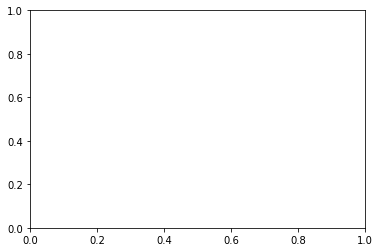

In [123]:
#print(accre_data.WaitTime)
#accre_data.WaitTime = pd.to_numeric(accre_data.WaitTime)
#print(accre_data.WaitTime)
plt.scatter(accre_data.ReqMem,accre_data.WaitTime) # ARE THESE UNITS EVEN RIGHT convert bytes to KB, nanoseconds to days
plt.xlabel('Requested Memory [KB]')
plt.ylabel('Wait Time [Day]')